<a href="https://colab.research.google.com/github/nhatvu205/DS102.P21.2/blob/master/Lab-3/%5BDS102%5D_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Face Detection using PCA

Using PCA mechanism to correctly assign the face images to persons on the [Yale Face Dataset](https://vismod.media.mit.edu/vismod/classes/mas622-00/datasets/). Download the training data and testing data in this link.

#### Assignment 1 (4 scores): Implement PCA using Numpy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import os
import pandas as pd
import numpy as np
import imageio.v3 as iio
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import matplotlib.pyplot as plt
from collections import Counter

In [31]:
def load_images_from_folder(folder_path, img_size=(64, 80)):
    images, labels = [], []
    for person_name in os.listdir(folder_path):
        person_path = os.path.join(folder_path, person_name)
        if os.path.isdir(person_path) and person_name != 'test':
            print(f"Đang xử lý thư mục: {person_name}")
            for filename in os.listdir(person_path):
                img_path = os.path.join(person_path, filename)
                try:
                    img = iio.imread(img_path, index=0)
                    if img.dtype == np.uint8 and img.ndim == 2:
                        img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
                    if img.ndim == 3:
                        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
                    if img.ndim != 2:
                        raise ValueError(f"Ảnh {img_path} không phải 2D sau khi xử lý")
                    img = cv2.equalizeHist(img)
                    img = cv2.resize(img, img_size)
                    images.append((img.flatten().astype(np.float32)) / 255.0)
                    labels.append(person_name)
                except Exception as e:
                    print(f"Lỗi khi đọc ảnh: {img_path} - {e}")
    return np.array(images), np.array(labels)

In [21]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.mean = None
        self.components = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
        self.components = Vt[:self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components.T)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [30]:
def load_test_images(folder_path, img_size=(64, 80)):
    images, filenames = [], []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        try:
            img = iio.imread(img_path, index=0)
            if img.dtype == np.uint8 and img.ndim == 2:
                img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
            if img.ndim == 3:
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            if img.ndim != 2:
                raise ValueError(f"Ảnh {img_path} không phải 2D sau khi xử lý")
            img = cv2.equalizeHist(img)
            img = cv2.resize(img, img_size)
            images.append((img.flatten().astype(np.float32)) / 255.0)
            filenames.append(filename)
        except Exception as e:
            print(f"Lỗi khi đọc ảnh test: {img_path} - {e}")
    return np.array(images), filenames

#### Assignment 2 (4 scores):
- Reading the training images.
- Approximating the Principle Space having **20 dimensions**.
- Visualize the base of this Principle Space.

In [32]:
base_path = '/content/drive/MyDrive/Colab Notebooks/DS102/Lab 3/yalefaces'
train_path = base_path
test_path = base_path + '/test'

X_train, y_train = load_images_from_folder(train_path)
X_test, test_filenames = load_test_images(test_path)
print(f"Kích thước X_train: {X_train.shape}")
print(f"Kích thước X_test: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

n_components = 20
print(f"Số thành phần chính được chọn: {n_components}")

pca_model = PCA(n_components=n_components)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)

Đang xử lý thư mục: person-4
Đang xử lý thư mục: person-2
Đang xử lý thư mục: person-15
Đang xử lý thư mục: person-8
Đang xử lý thư mục: person-7
Đang xử lý thư mục: person-6
Đang xử lý thư mục: person-9
Đang xử lý thư mục: person-5
Đang xử lý thư mục: person-3
Đang xử lý thư mục: person-11
Đang xử lý thư mục: person-1
Đang xử lý thư mục: person-12
Đang xử lý thư mục: person-14
Đang xử lý thư mục: person-10
Đang xử lý thư mục: person-13
Kích thước X_train: (150, 5120)
Kích thước X_test: (15, 5120)
Số thành phần chính được chọn: 20


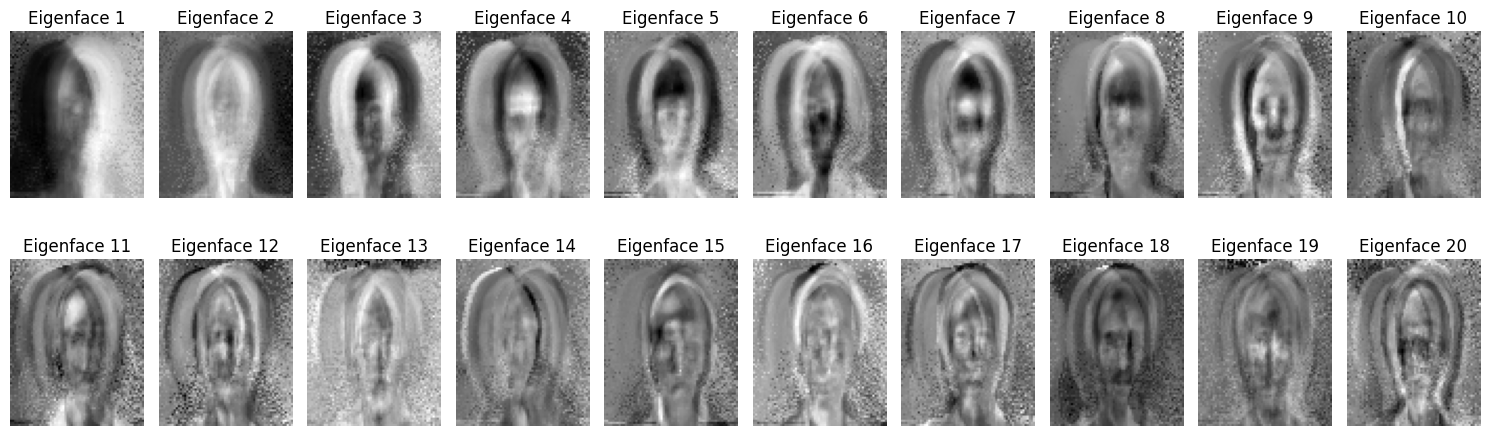

In [36]:
eigenfaces = pca_model.components

def show_eigenfaces(components, img_shape=(64, 80), num_eigenfaces=20):
    plt.figure(figsize=(15, 5))
    for i in range(min(num_eigenfaces, components.shape[0])):
        eigenface = components[i].reshape(img_shape)
        eigenface = (eigenface - np.min(eigenface)) / (np.max(eigenface) - np.min(eigenface))
        plt.subplot(2, num_eigenfaces // 2, i + 1)
        plt.imshow(eigenface, cmap='gray')
        plt.title(f'Eigenface {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_eigenfaces(eigenfaces, img_shape=(80, 64), num_eigenfaces=20)

#### Assignment 3 (2 scores):
- Assign persons to the face images in testing data.
- Evaluate the accuracy of this face recognition system.

In [46]:
def classify(test_proj, train_proj, train_labels, metric='cosine', threshold=0.6):
    predictions = []
    scores = []
    for test_vec in test_proj:
        if metric == 'cosine':
            similarity = cosine_similarity(train_proj, test_vec.reshape(1, -1)).flatten()
            score = np.max(similarity)
            closest_idx = np.argmax(similarity)
            if score >= threshold:
                predictions.append(train_labels[closest_idx])
            else:
                predictions.append("unknown")
        else:  # Euclidean distance
            distances = euclidean_distances(train_proj, test_vec.reshape(1, -1)).flatten()
            score = np.min(distances)
            closest_idx = np.argmin(distances)
            if score <= threshold:
                predictions.append(train_labels[closest_idx])
            else:
                predictions.append("unknown")
        scores.append(score)
    return predictions, scores

In [52]:
results = []

for fname, pred, true_label, sim in zip(test_filenames, predictions, y_true, sims):
    is_correct = 1 if pred == true_label else 0
    results.append({
        'File Name': fname,
        'Predicted Label': pred,
        'True Label': true_label,
        'Similarity': sim,
        'Correct': 'Yes' if is_correct else 'No'
    })

df_results = pd.DataFrame(results)

accuracy_per_person = df_results.groupby('True Label').agg(
    accuracy=('Correct', lambda x: (x == 'Yes').mean())
)

print("Detailed Results:")
print(df_results)

print("\nAccuracy per Person:")
print(accuracy_per_person)

total_accuracy = accuracy * 100
print(f"\nOverall Accuracy: {total_accuracy:.2f}%")

Detailed Results:
               File Name Predicted Label True Label  Similarity Correct
0       person-1.glasses        person-1   person-1    0.986053     Yes
1     person-2.leftlight       person-12   person-2    0.939733      No
2         person-3.happy        person-3   person-3    0.997964     Yes
3          person-5.wink        person-5   person-5    0.997503     Yes
4   person-6.centerlight        person-6   person-6    0.849629     Yes
5     person-7.surprised        person-7   person-7    0.990623     Yes
6    person-8.rightlight        person-4   person-8    0.951811      No
7        person-9.sleepy        person-9   person-9    0.987206     Yes
8    person-10.noglasses       person-10  person-10    0.996175     Yes
9       person-11.normal       person-11  person-11    0.970548     Yes
10  person-12.rightlight        person-2  person-12    0.695894      No
11        person-13.wink       person-13  person-13    0.990873     Yes
12   person-14.leftlight        person-6  pers